# Principal Components Analysis

## Background reading:
*Intro to Statistical Learning*: Chapter 6, Principal Components Regression (Sections 6.3.1, Page 252-259)

*Intro to Statistical Learning*: Chapter 12, Principal Components Analysis (Sections 12.2, Page 498-510)

## Dataset:
The example from github uses the ecommerce testing dataset from kaggle
Link: https://

Attribute columns:
1. ID

**Article:** https:// 

## Essence of Data:

**What is PCA?**
Principal components analysis (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables. While retaining the maximum amount of information, it improves the interpretability of data and realizes the visualization of multidimensional data.

**How does PCA work?**
Article: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

1. Standardized (decentralized) initial data
2. Calculate covariance matrix of standardized data to identify correlation
3. Calculate eigenvectors and eigenvalues of covariance matrix to identify principal components
4. Create feature vectors to determine which principal components to retain
5. Recast data along the principal component axis

The equation 


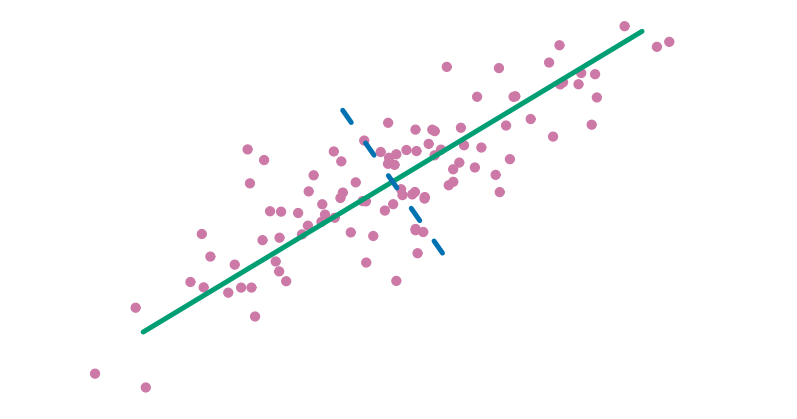




### Examples of application?
**Article:** 

https:// 

**Article about :**

https://
https://

Principal components analysis can be used to 

### Example Code

In [2]:
import numpy as np
#设置一下np的输出格式
np.set_printoptions(threshold=100,precision= 4,suppress=True)

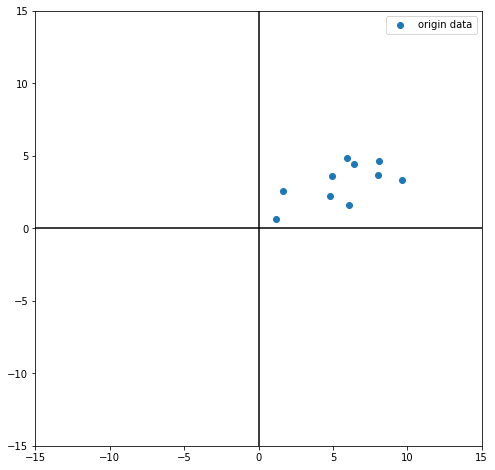

In [20]:
import numpy as np
#随机生成数据
np.random.seed(0)
data = np.random.uniform(1,10,(10,2))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(10,1))
data

#画原始数据图
size = 15
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='origin data')
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [4]:
#去中心化
data_norm = data-data.mean(axis = 0)
data_norm

array([[ 0.2542,  1.7206],
       [ 0.7398,  1.2455],
       [-0.8722, -0.9112],
       [-0.7468,  0.4277],
       [ 3.9879,  0.146 ],
       [ 2.4404,  1.4589],
       [ 0.4273, -1.5339],
       [-4.0458, -0.5652],
       [-4.5031, -2.4852],
       [ 2.3183,  0.4968]])

In [5]:
#分离x和y
X = data_norm[:,0]
Y = data_norm[:,1]
X,Y

(array([ 0.2542,  0.7398, -0.8722, -0.7468,  3.9879,  2.4404,  0.4273,
        -4.0458, -4.5031,  2.3183]),
 array([ 1.7206,  1.2455, -0.9112,  0.4277,  0.146 ,  1.4589, -1.5339,
        -0.5652, -2.4852,  0.4968]))

In [6]:
#得到协方差矩阵
C = np.cov(data_norm.T)
C

array([[7.3325, 2.2168],
       [2.2168, 1.8633]])

In [7]:
#计算特征值和特征向量
vals, vecs = np.linalg.eig(C)
#重新排序，从大到小
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]

In [8]:
#第一个特征值对应的特征向量
vals[0],vecs[:,0]

(8.118170385604765, array([0.9426, 0.334 ]))

In [9]:
#第二个特征值对应的特征向量
vals[1],vecs[:,1]

(1.0776889576956008, array([-0.334 ,  0.9426]))

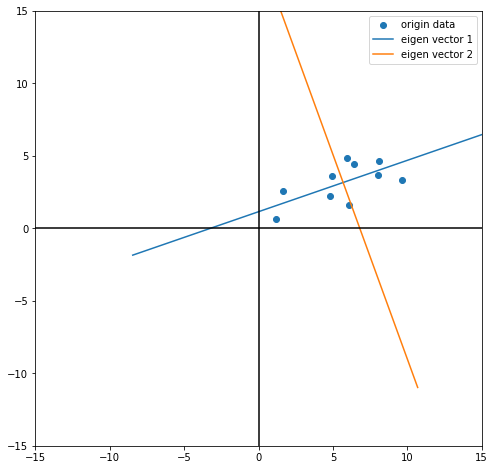

In [10]:
#这时候，相当于已经在数据中定义了两个轴，第一个轴的方向是第一个特征向量v1，第二个轴的方向是第二个特征向量v2
import matplotlib.pyplot as plt
#设置图大小
size = 15

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [11]:
#数据在主成分1上的投影坐标是Y
k=1
Q = vecs[:,:k]
Y = np.matmul(data_norm,Q)
Y

array([[ 0.8144],
       [ 1.1133],
       [-1.1265],
       [-0.561 ],
       [ 3.8076],
       [ 2.7876],
       [-0.1097],
       [-4.0022],
       [-5.0746],
       [ 2.3511]])

In [13]:
#得到去中心化的还原数据
np.matmul(Y,Q.T)

array([[ 0.7676,  0.272 ],
       [ 1.0494,  0.3719],
       [-1.0618, -0.3763],
       [-0.5288, -0.1874],
       [ 3.5888,  1.2719],
       [ 2.6275,  0.9312],
       [-0.1034, -0.0366],
       [-3.7723, -1.3369],
       [-4.7831, -1.6952],
       [ 2.216 ,  0.7854]])

In [14]:
#加上均值，还原数据
data_ = np.matmul(Y,Q.T)+data.mean(0)
data_

array([[6.4527, 3.4356],
       [6.7345, 3.5355],
       [4.6233, 2.7873],
       [5.1563, 2.9761],
       [9.2739, 4.4355],
       [8.3125, 4.0947],
       [5.5817, 3.1269],
       [1.9128, 1.8266],
       [0.902 , 1.4684],
       [7.9011, 3.9489]])

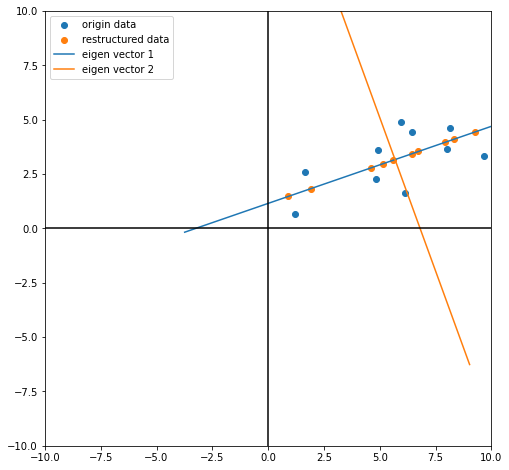

In [15]:

import matplotlib.pyplot as plt
#设置图大小
size = 10

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

plt.scatter(data_[:,0],data_[:,1],label='restructured data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

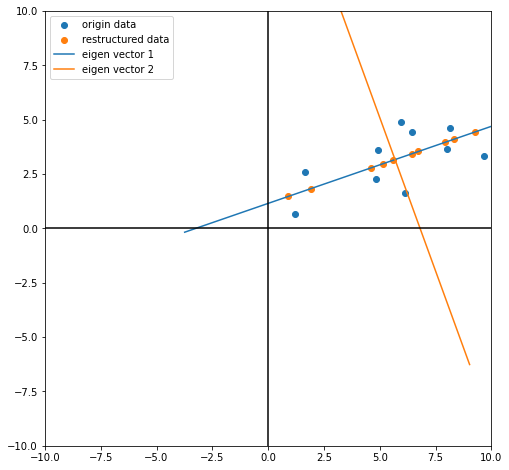

In [17]:
#用sklearn的PCA
import matplotlib.pyplot as plt

#sklearn PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca.fit(data)
Y = pca.fit_transform(data)
vecs = pca.components_.T
data_ = np.dot(Y[:,:1],vecs[:,:1].T)+data.mean(0)


#设置图大小
size = 10

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

plt.scatter(data_[:,0],data_[:,1],label='restructured data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()